In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/startup-logistic-regression/50_Startups.csv


> ## Recolección de los datos.

In [2]:
data = pd.read_csv("/kaggle/input/startup-logistic-regression/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


> ## Exploración de datos (EDA)

In [3]:
data.shape

(50, 5)

In [4]:
data.columns.values

array(['R&D Spend', 'Administration', 'Marketing Spend', 'State',
       'Profit'], dtype=object)

In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
col_num = [col for col in data.columns if data[col].dtypes not in ["object"]]
col_cat = [col for col in data.columns if data[col].dtypes in ["object"]]
print(col_num,col_cat)

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'] ['State']


### Descripción del dataset.
* #### El dataset contiene 50 filas y 5 columnas/variables.
* #### Hay 5 variables en total de las cuales 1 es una variable independiente categórica y 4 son numéricas, siendo la variable dependiente una de ellas (profit).
* #### El dataset no contiene datos nulos ni datos duplicados. 

> ## Análisis de variables numéricas

* ### Variable dependiente (Profit)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

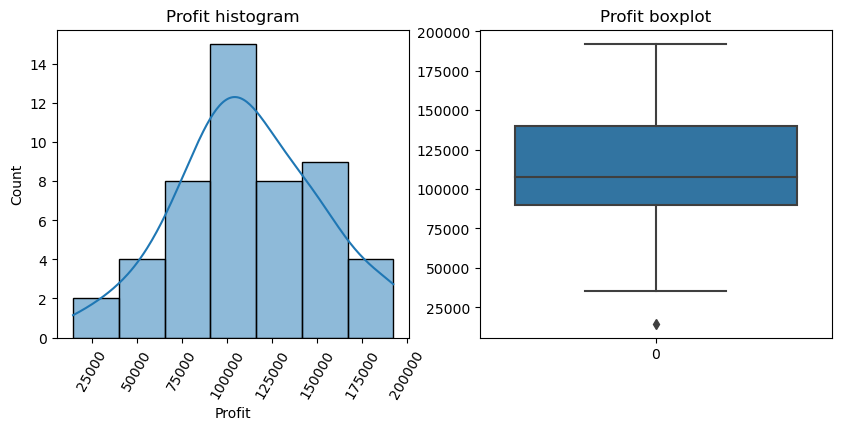

In [11]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(data["Profit"], kde=True,)
plt.xticks(rotation=60)
plt.title("Profit histogram")

plt.subplot(1,2,2)
sns.boxplot(data["Profit"])
plt.title("Profit boxplot")


plt.show()

In [12]:
data["Profit"].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

### Descripción de la variable dependiente.
* #### El histograma presenta una distribución simetrica de los datos.
* #### La media de las ganancias es de 112.000 con una desviación de 40.306.
* #### El 75% de las empresas tienen una ganancia de hasta 140.000. El 15% restante tiene una ganancia de entre 140.000 y 192.000.

* ### Variables independientes.

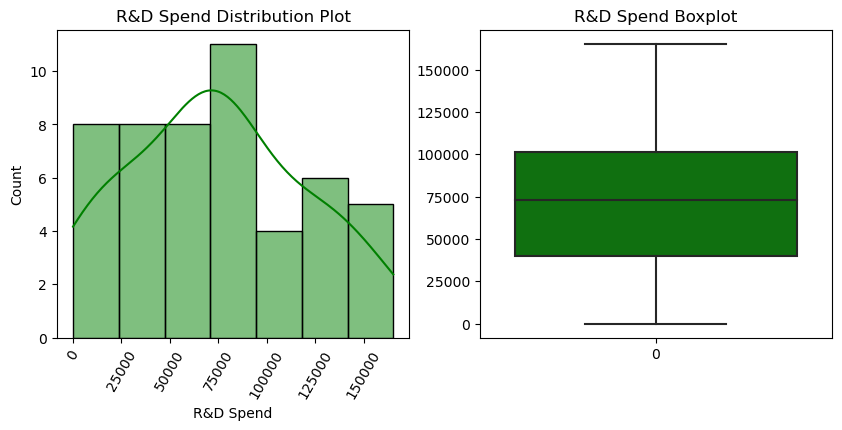

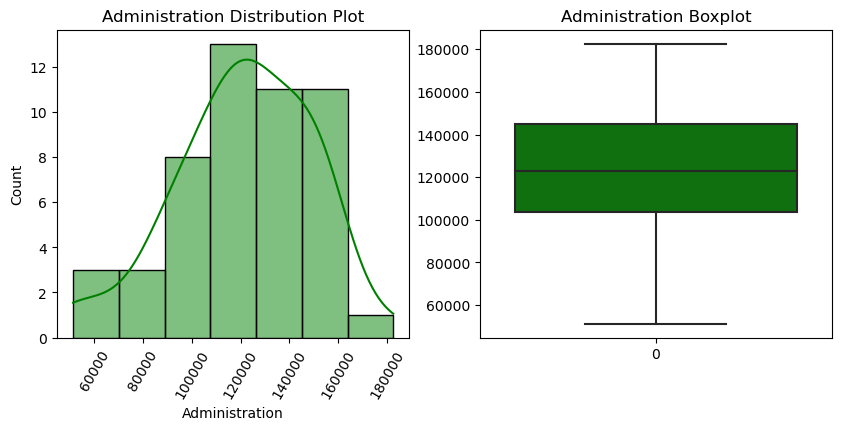

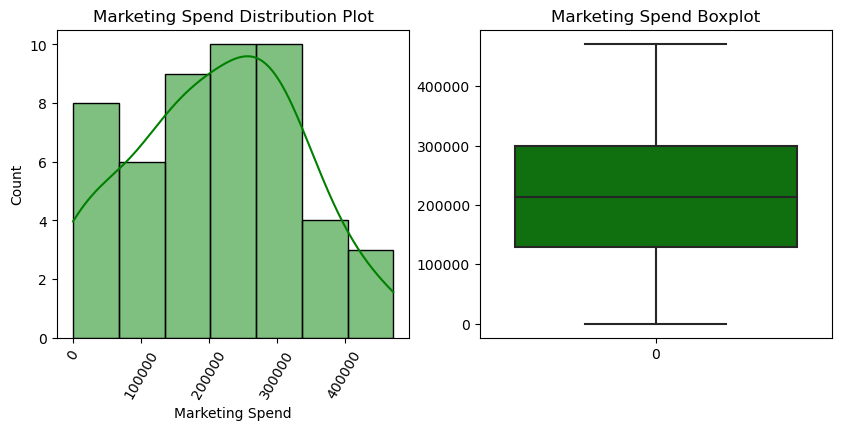

In [13]:
for col in col_num:
    if col != "Profit":
        plt.figure(figsize=(10,4))

        plt.subplot(1,2,1)
        sns.histplot(data[col],kde=True,color="green")
        plt.xticks(rotation=60)
        plt.title(col+" Distribution Plot")

        plt.subplot(1,2,2)
        sns.boxplot(data[col],color="green")
        plt.title(col+" Boxplot")

        plt.show()

In [14]:
data[col_num].iloc[:,:3].describe()

,R&D Spend,Administration,Marketing Spend
count,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800
std,45902.256482,28017.802755,122290.310726
min,0.000000,51283.140000,0.000000
25%,39936.370000,103730.875000,129300.132500
50%,73051.080000,122699.795000,212716.240000
75%,101602.800000,144842.180000,299469.085000
max,165349.200000,182645.560000,471784.100000


### Descripción variables independientes numéricas.
* #### Las mayorías de las empresas invierten la media en las areas de Investigación y Desarrollo, Administración y Marketing.
* #### La inversión media del area de Investigación y desarrollo es de 73.721, en el area de Administración es de 121.344, y en el area de Marketing es de 211.000. 
* #### La inversión minima que hacen cada empresa en su area de Administración es de 51.280, mientras que en el área de Investigación y Desarrollo y Marketing es de 0.

* #### Análisis de las variables independientes númericas contra la variable dependiente.

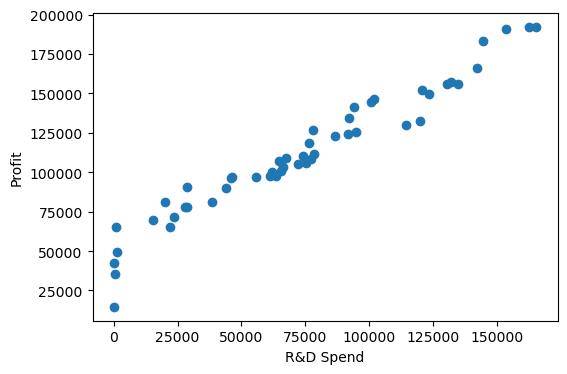

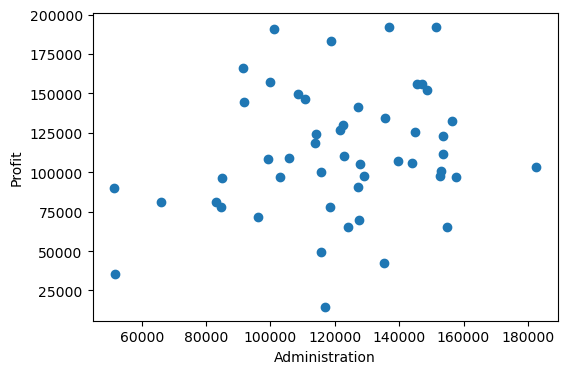

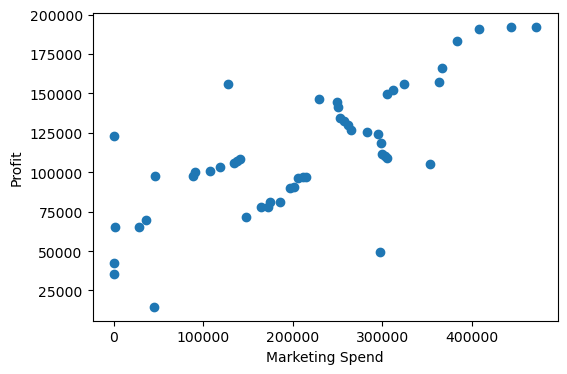

In [15]:
for col in col_num:
    if col != "Profit":
        plt.figure(figsize=(6,4))

        plt.scatter(x=data[col],y=data["Profit"])
        plt.ylabel("Profit")
        plt.xlabel(col)

        plt.show()

In [16]:
data[col_num].corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Descripción de correlaciones de variables numéricas con la variable dependiente.
* #### Las variable R&D spend tiene una correlación con la variable dependiente de un 97%.
* #### La variable Marketing Spend tiene una correlación con la variable dependiente de un 74%.
* #### Sin embargo podemos ir observando que entre estas dos variables mencionadas anteriormente describen una multicolinealidad al tener un grado de 72% de correlación entre ellas.

> ## Análisis de variables categóricas

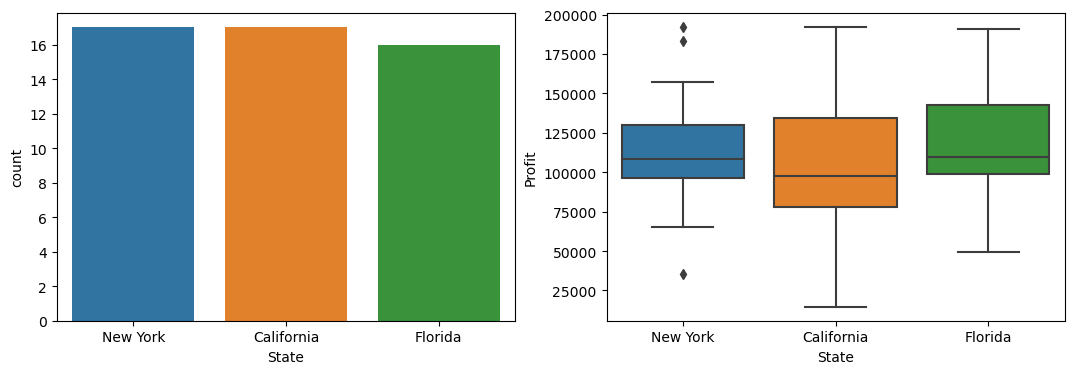

In [17]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.countplot(x=data["State"])

plt.subplot(1,2,2)
sns.boxplot(x=data["State"],y=data["Profit"])

plt.show()

In [18]:
data["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [19]:
data.groupby("State")["Profit"].mean()

State
California    103905.175294
Florida       118774.024375
New York      113756.446471
Name: Profit, dtype: float64

### Descripción de la variable categórica
* #### Las 50 empresas se distribuyen en los estados de California, Florida y New York.
* #### Las empresas en California tienen una ganancia promedio menor al de las empresas en Florida y New York de solo 10000.

> ## Preprocesado de datos (Data Preprocessing)

In [20]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


* #### A las variables categóricas las transformo en variables dummies.

In [21]:
state_dummy = pd.get_dummies(data["State"], prefix="state",drop_first=True)
data_new = pd.concat([data,state_dummy],axis=1)
data_new.drop(["State"],axis=1,inplace=True)
data_new.head()

,R&D Spend,Administration,Marketing Spend,Profit,state_Florida,state_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


* #### Chequeo las correlaciones nuevamente con todas las variables.

In [22]:
 data_new.corr()

,R&D Spend,Administration,Marketing Spend,Profit,state_Florida,state_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
state_Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
state_New York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


* #### Chequeo de las multicolinealidades con el metodo VIF (variance inlation factor).

In [23]:
X = data_new.drop(["Profit"],axis=1)
Y = data_new["Profit"]

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF,features
0,8.451019,R&D Spend
1,4.950277,Administration
2,8.092278,Marketing Spend
3,2.004519,state_Florida
4,1.928836,state_New York


#### No presentan una multicolinealidad importante, por lo tanto no eliminamos ninguna variable del dataset

* #### Separo los datos en datos de entrenamiento y datos de pruebas.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

> ## Construcción del modelo

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [29]:
profit_predict = lm.predict(x_test)

> ## Evaluación del modelo

In [30]:
lm.score(x_test,y_test)

0.9347068473282424

In [31]:
SSD = sum((y_test-profit_predict)**2)
SSD

835028640.3257754

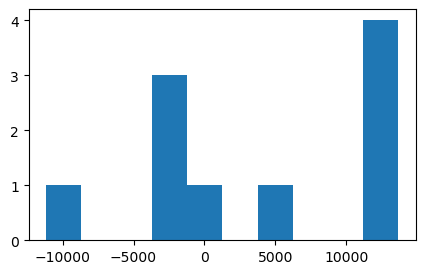

In [32]:
plt.figure(figsize=(5,3))
plt.hist(y_test-profit_predict)
plt.show()

In [33]:
RSE = np.sqrt(SSD/(len(y_test)-len(x_test.columns)-1))
RSE

14448.431059511058

In [34]:
profit_mean = y_test.mean()
profit_mean

122277.407

In [35]:
error = RSE/profit_mean
error

0.11816108481521086

> ## Conclusión del modelo 

* #### El valor del R2 nos indica que el modelo se ajusta un 93% bien a los datos verdaderos.
* #### El valor de RSE nos indica que el error estandar residual es 14448.
* #### Tenemos un error de un 11%.

> ## Correción del modelo

#### Voy a utilizar otro metodo para realizar el modelo de regresión lineal utilizando la libreria statsmodels pero esta vez para chequear los p valores de cada variable y chequear el p valor del estadístico f.

In [36]:
import statsmodels.formula.api as smf

In [37]:
data_new.rename(columns={"R&D Spend": "RD_Spend", "Marketing Spend":"Marketing_Spend",
                        "state_New York":"state_New_York"}, inplace=True)
train,test = train_test_split(data_new,test_size=0.2,random_state=0)

In [38]:
lm2 = smf.ols(formula="Profit~"+("+").join(train.drop(["Profit"],axis=1).columns), data=train).fit()

In [39]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           3.91e-21
Time:                        19:45:51   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.255e+04   8358.538      5.091      0.000    2.56e+04    5.95e+04
RD_Spend            0.7735      0.055     14.025      0.000       0.661       0.886
Administration      0.0329      0.066      0.495      0.624      -0.102       0.168
Marketing_Spend     0.0366      0.019      1.884      0.068      -0.003       0.076
state_Florida    -959.2842   4038.108     -0.238      0.814   -9165.706    7247.138
state_New_York    699.3691   3661.563      0.191      0.850   -6741.822    8140.560
==============================================================================
Omnibus:                       15.823   Durbin-Watson:                   2.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.231
Skew:                          -1.094   Prob(JB):                     9.03e-06
Kurtosis:                       6.025   Cond. No.                     1.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* #### El p valor del estadístico f es muy pequeño, por lo tanto rechazamos la hipotesis nula de que todos los coeficientes que acompañan a las variables son 0.
* #### Observando los p valores de cada variable puedo ver que las variables Administration, Marketing_Spend, state_Florida y state_New_York tienen un alto p valor mayor a 0,05 que es el nivel de significación por ende acepto la hipotesis nula de que el coeficiente que acompaña a estos valores es 0. 
* ### También concluyo de que lo que más ganancia va a dar a una empresa es invertir en Investigación y desarrollo.

In [40]:
data_new.head()

,RD_Spend,Administration,Marketing_Spend,Profit,state_Florida,state_New_York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [41]:
X = data_new.drop(["Profit", "Administration", "Marketing_Spend",
                  "state_Florida", "state_New_York"], axis=1)
Y = data_new["Profit"]

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [43]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [44]:
profit_predict = lm.predict(x_test)

In [45]:
lm.score(x_test,y_test)

0.9464587607787219

In [46]:
SSD = sum((y_test-profit_predict)**2)
SSD

684734407.1905932

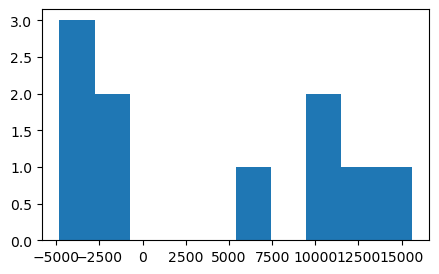

In [47]:
plt.figure(figsize=(5,3))
plt.hist(y_test-profit_predict)
plt.show()

In [48]:
RSE = np.sqrt(SSD/(len(y_test)-len(x_test.columns)-1))
RSE

9251.58369679614

In [49]:
profit_mean = y_test.mean()
profit_mean

122277.407

In [50]:
error = RSE/profit_mean
error

0.07566061403964953

### Conclusión del nuevo modelo.
* #### El R2 es de 94%, un poco más ajustado que el modelo anterior.
* #### El error estandar residual es de 9251, inferior al del modelo anterior.
* #### Y tenemos un 7% de error, un error que el modelo no puede explicar, también inferior al del modelo anterior.